In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(f"Elementos faltantes:\n{df.isna().sum()}") # Identifica se tem elementos faltantes na base de dados
# Não existem elementos faltantes na base de dados
#df = pd.get_dummies(df, columns=['sex'], prefix=['sex'])
df.head()

Elementos faltantes:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(df["bmi"], df["charges"], test_size = 0.3)

In [5]:
regressor = LinearRegression()
XTrain = pd.DataFrame(XTrain) #Aqui, o conteúdo de XTrain está em formato unidimensional(série), o método fit do regressor exige que XTrain tenha estrutura bidimensional(dataframe).
regressor.fit(XTrain, yTrain)

LinearRegression()

In [6]:
XTest = pd.DataFrame(XTest)
yPred = regressor.predict(XTest) #Tipo array

dfResultado = pd.concat([XTest, yTest], axis=1)
dfResultado["Predição"] = yPred
print(dfResultado)

#calcula o erro médio quadrático (MSE) entre os valores reais de "charges" e as previsões armazenadas em "Predição"
mse = mean_squared_error(dfResultado["charges"], dfResultado["Predição"])

# indica em média quantos "charges" suas previsões estão afastadas dos valores reais.
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

         bmi      charges      Predição
1025  34.600   2020.17700  14780.031101
605   34.100   9283.56200  14583.435251
1273  27.610   4747.05290  12031.621114
524   26.070  38245.59327  11426.105895
1030  23.655  21677.28345  10476.547937
...      ...          ...           ...
102   30.115  21344.84670  13016.566324
107   30.875   3877.30425  13315.392016
2     33.000   4449.46200  14150.924380
247   35.860   1986.93340  15275.452644
604   28.310  17468.98390  12306.855304

[402 rows x 3 columns]
RMSE: 11573.121495619356


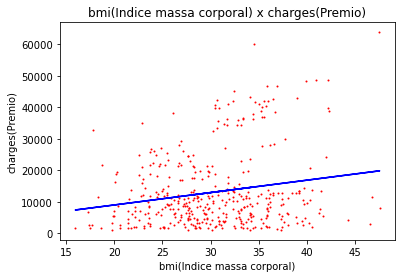

In [7]:
plt.scatter(dfResultado["bmi"][::1], dfResultado["charges"][::1], color = 'red', s=1) #[inicio:fim:step] 1% das amostras
plt.plot(dfResultado["bmi"], dfResultado["Predição"], color='blue')
plt.title("bmi(Indice massa corporal) x charges(Premio)")
plt.xlabel("bmi(Indice massa corporal)")
plt.ylabel("charges(Premio)")
plt.show()